In [1]:
%load_ext autoreload
%load_ext autotime
%autoreload 2

## Imports and Project Path

In [2]:
# importing packages
import os, sys
import pandas as pd
import numpy as np
import sqlite3

# setting project path
gparent = os.path.join(os.pardir, os.pardir)
sys.path.append(gparent)

from IPython.display import Audio
sound_file = '/Users/dsbox/Documents/Flatiron/phase_5/WAILERLP.wav'

from dython.nominal import associations

from src import class_Database as d
from src import helper_functions as f
from src import visualizations as v

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme('talk')
plt.style.use('fivethirtyeight')
sns.set_palette('GnBu_r')
pd.options.display.max_rows = 300

time: 1.59 s


## Creating The Database

In [3]:
# creating database & database class instance
database_name = 'outcomes.db'
db = d.Database(database_name)

time: 1.46 ms


**Run The Cell Below Once And Then Comment Out**

In [4]:
# file_name = 'anonymisedData.zip'
# db.populate(file_name, database_name)

time: 601 µs


## Creating SQL `conn`, `cur`

In [5]:
data_path = os.path.join(gparent,'data/processed','outcomes.db')
conn = sqlite3.connect(data_path)  
cur = conn.cursor()

time: 1.43 ms


### Database ERD

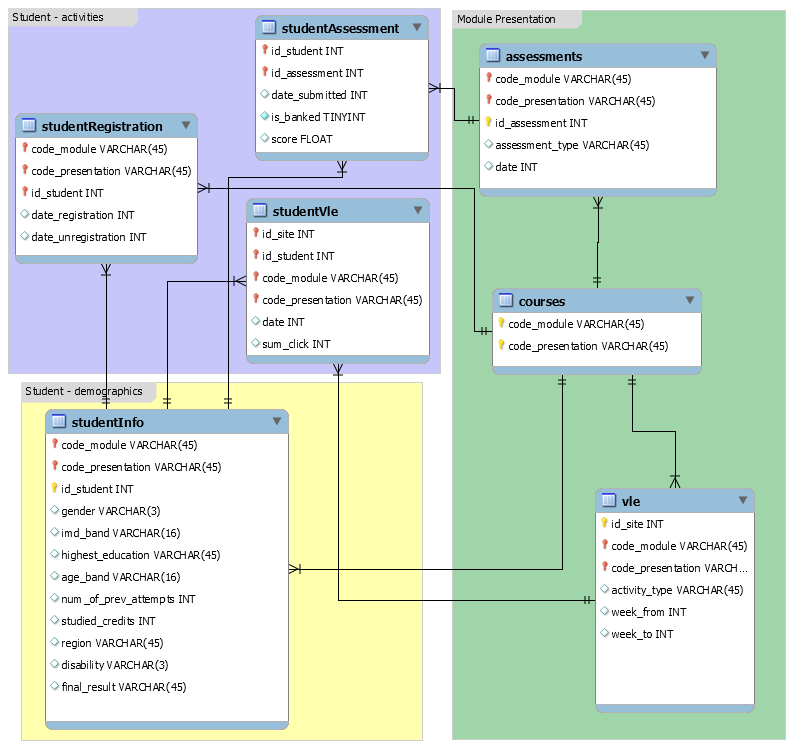

time: 3.27 ms


In [6]:
db.erd

## Quarter Term Data Experiments

In [7]:
q="""
SELECT date_registration, date_unregistration,
code_module || code_presentation || id_student AS row_id
FROM STUDENTREGISTRATION"""
half_reg = pd.read_sql(q, conn)

time: 94.7 ms


In [8]:
half_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_registration    32548 non-null  object
 1   date_unregistration  10072 non-null  object
 2   row_id               32593 non-null  object
dtypes: object(3)
memory usage: 764.0+ KB
time: 10.2 ms


In [9]:
half_reg.head()

,date_registration,date_unregistration,row_id
0,-159,None,AAA2013J11391
1,-53,None,AAA2013J28400
2,-92,12,AAA2013J30268
3,-52,None,AAA2013J31604
4,-176,None,AAA2013J32885


time: 8.18 ms


In [10]:
converts = ['date_registration', 'date_unregistration']
half_reg[converts] = half_reg[converts].apply(pd.to_numeric)

time: 28.3 ms


In [11]:
after_date = half_reg[(half_reg.date_unregistration.isna())|(half_reg.date_unregistration > 120)]

time: 5.52 ms


In [12]:
after_date.date_unregistration.unique()

array([ nan, 175., 135., 144., 129., 158., 191., 123., 185., 166., 170.,
       187., 177., 160., 202., 172., 128., 241., 173., 203., 240., 138.,
       163., 178., 242., 220., 219., 199., 164., 235., 207., 143., 234.,
       201., 229., 132., 165., 227., 174., 150., 228., 180., 182., 213.,
       146., 226., 153., 139., 157., 208., 198., 200., 136., 137., 152.,
       130., 121., 145., 195., 156., 159., 216., 212., 209., 223., 188.,
       167., 125., 148., 149., 122., 222., 183., 184., 179., 124., 206.,
       142., 186., 154., 168., 215., 217., 236., 192., 171., 214., 221.,
       237., 140., 131., 189., 194., 224., 169., 151., 205., 127., 197.,
       147., 193., 230., 190., 133., 134., 161., 126., 225., 162., 204.,
       141., 211., 239., 196., 155., 233., 210., 218., 181., 232., 231.,
       176., 444.])

time: 4.15 ms


In [13]:
after_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24777 entries, 0 to 32592
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_registration    24770 non-null  float64
 1   date_unregistration  2256 non-null   float64
 2   row_id               24777 non-null  object 
dtypes: float64(2), object(1)
memory usage: 774.3+ KB
time: 8.61 ms


In [14]:
after_date = after_date[~after_date.date_registration.isna()]

time: 3.57 ms


In [15]:
after_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24770 entries, 0 to 32592
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_registration    24770 non-null  float64
 1   date_unregistration  2255 non-null   float64
 2   row_id               24770 non-null  object 
dtypes: float64(2), object(1)
memory usage: 774.1+ KB
time: 9.81 ms


In [16]:
half_sa = db.simple_df('STUDENTASSESSMENT')

time: 331 ms


In [17]:
half_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id_assessment   173912 non-null  object
 1   id_student      173912 non-null  object
 2   date_submitted  173912 non-null  object
 3   is_banked       173912 non-null  object
 4   score           173739 non-null  object
dtypes: object(5)
memory usage: 6.6+ MB
time: 40.7 ms


In [18]:
converts = ['date_submitted', 'score']
half_sa[converts] = half_sa[converts].apply(pd.to_numeric)

time: 192 ms


In [19]:
half_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  object 
 1   id_student      173912 non-null  object 
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  object 
 4   score           173739 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.6+ MB
time: 29.9 ms


In [20]:
len(half_sa.id_student.unique())

23369

time: 20.1 ms


In [21]:
half_sa.describe()

,date_submitted,score
count,173912.000000,173739.000000
mean,116.032942,75.799573
std,71.484148,18.798107
min,-11.000000,0.000000
25%,51.000000,65.000000
50%,116.000000,80.000000
75%,173.000000,90.000000
max,608.000000,100.000000


time: 26.1 ms


In [22]:
half_sa.date_submitted = half_sa.date_submitted + 25

time: 1.65 ms


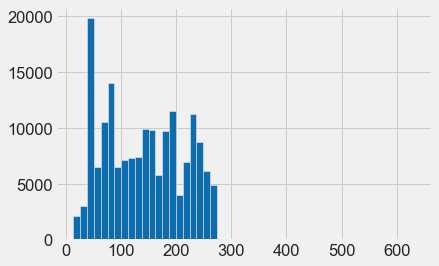

time: 172 ms


In [23]:
half_sa.date_submitted.hist(bins=50);

In [24]:
half_sa = half_sa[half_sa.date_submitted < 73]

time: 11.8 ms


In [25]:
len(half_sa.id_student.unique())

21384

time: 8.65 ms


In [26]:
mean_score = half_sa.groupby(['id_student'])['score'].mean().reset_index(name='mean_score')

time: 24.7 ms


In [27]:
median_score = half_sa.groupby(['id_student'])['score'].median().reset_index(name='median_score')

time: 25.9 ms


In [28]:
half_sa = half_sa.merge(mean_score, on='id_student').merge(median_score, on='id_student')

time: 35 ms


In [29]:
half_sa.head(20)

,id_assessment,id_student,date_submitted,is_banked,score,mean_score,median_score
0,1752,11391,43,0,78.0,78.000000,78.0
1,1752,28400,47,0,70.0,70.000000,70.0
2,1752,31604,42,0,72.0,72.000000,72.0
3,1752,32885,51,0,69.0,69.000000,69.0
4,1752,38053,44,0,79.0,79.000000,79.0
5,1752,45462,45,0,70.0,70.000000,70.0
6,1752,45642,43,0,72.0,72.000000,72.0
7,1752,52130,44,0,72.0,72.000000,72.0
8,1752,53025,34,0,71.0,71.000000,71.0
9,1752,57506,43,0,68.0,68.000000,68.0


time: 12.9 ms


In [30]:
q = """
SELECT SV.*,
SI.*,
SV.date + 25 as date_shift,
SUM(SV.sum_click) AS click_sum,
COUNT(SV.sum_click) AS num_activities,
SV.code_module || SV.code_presentation || SV.id_student AS row_id
FROM
STUDENTVLE as SV
JOIN 
STUDENTINFO as SI
ON SV.code_module = SI.code_module
AND SV.code_presentation = SI.code_presentation
AND SV.id_student = SI.id_student
WHERE date_shift < 120
GROUP BY 
SV.code_module,
SV.code_presentation,
SV.id_student;
"""
sv_si_half = pd.read_sql(q, conn)

time: 14.7 s


In [31]:
sv_si_half.describe()

,date_shift,click_sum,num_activities
count,29166.000000,29166.000000,29166.000000
mean,16.475245,683.254886,193.680930
std,11.266495,848.617033,187.102201
min,0.000000,1.000000,1.000000
25%,8.000000,163.000000,60.000000
50%,15.000000,407.000000,138.000000
75%,21.000000,872.000000,266.000000
max,119.000000,12940.000000,1577.000000


time: 18 ms


In [32]:
sv_si_half.date_shift = sv_si_half.date_shift.apply(pd.to_numeric)

time: 45.8 ms


In [33]:
sv_si_half.date_shift.describe()

count    29166.000000
mean        16.475245
std         11.266495
min          0.000000
25%          8.000000
50%         15.000000
75%         21.000000
max        119.000000
Name: date_shift, dtype: float64

time: 6.73 ms


In [34]:
q=""" 
SELECT SA.*,
SV.code_module || SV.code_presentation || SV.id_student AS row_id,
SA.date_submitted + 25 as date_shift,
AVG(SA.score) AS mean_score
FROM STUDENTASSESSMENT AS SA
JOIN STUDENTVLE AS SV
ON SA.id_student = SV.id_student
WHERE date_shift < 120
GROUP BY SA.id_student;
"""
sa = pd.read_sql(q, conn)

time: 54.9 s


In [35]:
sa.date_shift.describe()

count    23254.000000
mean        49.451191
std         12.958741
min         14.000000
25%         43.000000
50%         46.000000
75%         55.000000
max        119.000000
Name: date_shift, dtype: float64

time: 6.85 ms


In [36]:
sa.sort_values('id_student')

,id_assessment,id_student,date_submitted,is_banked,score,row_id,date_shift,mean_score
0,34873,100064,40,0,92,FFF2013J100064,65,92.000000
1,14996,100282,19,0,78,BBB2013J100282,44,78.000000
2,25362,100561,20,0,70,DDD2014J100561,45,75.000000
3,34886,1006742,21,0,78,FFF2014B1006742,46,78.500000
4,24295,100788,21,0,100,CCC2014J100788,46,91.833333
...,...,...,...,...,...,...,...,...
23249,34886,99670,5,0,94,FFF2014B99670,30,94.800000
23250,15008,99799,8,0,72,BBB2014B99799,33,81.000000
23251,1758,998493,13,0,75,AAA2014J998493,38,71.500000
23252,34860,999174,15,0,72,FFF2013B999174,40,84.333333


time: 25.8 ms


In [37]:
sv_si_half.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,code_module,code_presentation,id_student,gender,...,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_shift,click_sum,num_activities,row_id
0,AAA,2013J,100893,547013,-9,1,AAA,2013J,100893,M,...,20-30%,0-35,0,60,N,Pass,16,388,128,AAA2013J100893
1,AAA,2013J,101781,546614,-10,5,AAA,2013J,101781,M,...,80-90%,35-55,0,60,N,Pass,15,2199,380,AAA2013J101781
2,AAA,2013J,102806,546719,-10,3,AAA,2013J,102806,M,...,30-40%,0-35,0,60,N,Pass,15,940,332,AAA2013J102806
3,AAA,2013J,102952,546879,-3,1,AAA,2013J,102952,M,...,60-70%,0-35,0,60,N,Pass,22,491,122,AAA2013J102952
4,AAA,2013J,1035023,546652,-10,1,AAA,2013J,1035023,F,...,30-40%,35-55,0,60,N,Pass,15,812,232,AAA2013J1035023


time: 22.2 ms


In [38]:
sv_si_half.describe()

,date_shift,click_sum,num_activities
count,29166.000000,29166.000000,29166.000000
mean,16.475245,683.254886,193.680930
std,11.266495,848.617033,187.102201
min,0.000000,1.000000,1.000000
25%,8.000000,163.000000,60.000000
50%,15.000000,407.000000,138.000000
75%,21.000000,872.000000,266.000000
max,119.000000,12940.000000,1577.000000


time: 20.9 ms


In [39]:
half_svsisa = sv_si_half.merge(sa, on='row_id')

time: 74 ms


In [40]:
sa.head()

,id_assessment,id_student,date_submitted,is_banked,score,row_id,date_shift,mean_score
0,34873,100064,40,0,92,FFF2013J100064,65,92.000000
1,14996,100282,19,0,78,BBB2013J100282,44,78.000000
2,25362,100561,20,0,70,DDD2014J100561,45,75.000000
3,34886,1006742,21,0,78,FFF2014B1006742,46,78.500000
4,24295,100788,21,0,100,CCC2014J100788,46,91.833333


time: 8.87 ms


In [41]:
db.table_info('STUDENTINFO')

[(0, 'code_module', 'TEXT', 0, None, 0),
 (1, 'code_presentation', 'TEXT', 0, None, 0),
 (2, 'id_student', 'TEXT', 0, None, 0),
 (3, 'gender', 'TEXT', 0, None, 0),
 (4, 'region', 'TEXT', 0, None, 0),
 (5, 'highest_education', 'TEXT', 0, None, 0),
 (6, 'imd_band', 'TEXT', 0, None, 0),
 (7, 'age_band', 'TEXT', 0, None, 0),
 (8, 'num_of_prev_attempts', 'TEXT', 0, None, 0),
 (9, 'studied_credits', 'TEXT', 0, None, 0),
 (10, 'disability', 'TEXT', 0, None, 0),
 (11, 'final_result', 'TEXT', 0, None, 0)]

time: 3.75 ms


In [42]:
q = """
SELECT
/*selecting all from multiple tables*/
SI.*,
SA.*,
/*adding course length*/
C.module_presentation_length AS course_length,
/*shifting the date*/
SA.date_submitted + 25 as date_shift,
/* creating the row_id column by concatenation*/
SI.code_module || SI.code_presentation || SI.id_student AS row_id,
/* creating binarized target column*/
iif(SI.final_result='Pass' OR SI.final_result='Distinction', 0, 1) AS target,
/* creating weighted_ave column*/
SUM(SA.score*A.weight*.01) AS weighted_ave,
/* creating mean_score column*/
AVG(SA.score) as mean_score
FROM STUDENTASSESSMENT AS SA
JOIN
ASSESSMENTS AS A
ON A.id_assessment = SA.id_assessment
JOIN STUDENTINFO AS SI
ON SI.id_student = SA.id_student
JOIN COURSES AS C
ON SI.code_module = C.code_module
WHERE date_shift < 120
GROUP BY SA.id_student,
SI.code_module,
SI.code_presentation;
"""
q1_si_sa = pd.read_sql(q, conn)

time: 1.19 s


In [43]:
q1_si_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26650 entries, 0 to 26649
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           26650 non-null  object 
 1   code_presentation     26650 non-null  object 
 2   id_student            26650 non-null  object 
 3   gender                26650 non-null  object 
 4   region                26650 non-null  object 
 5   highest_education     26650 non-null  object 
 6   imd_band              25637 non-null  object 
 7   age_band              26650 non-null  object 
 8   num_of_prev_attempts  26650 non-null  object 
 9   studied_credits       26650 non-null  object 
 10  disability            26650 non-null  object 
 11  final_result          26650 non-null  object 
 12  id_assessment         26650 non-null  object 
 13  id_student            26650 non-null  object 
 14  date_submitted        26650 non-null  object 
 15  is_banked          

In [44]:
drops = ['code_module','code_presentation','id_student' ]
q1_si_sa = q1_si_sa.drop(drops, axis=1)

time: 13.3 ms


In [45]:
q1_si_sa.head()

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score,course_length,date_shift,row_id,target,weighted_ave,mean_score
0,F,West Midlands Region,A Level or Equivalent,0-10%,35-55,0,60,N,Pass,34873,40,0,92,240,65,FFF2013J100064,0,92.00,92.000000
1,F,Wales,Lower Than A Level,20-30%,0-35,1,120,N,Withdrawn,14996,19,0,78,234,44,BBB2013J100282,1,15.60,78.000000
2,M,East Anglian Region,Lower Than A Level,70-80%,0-35,1,60,N,Fail,25362,20,0,70,240,45,DDD2014J100561,1,76.00,75.000000
3,M,Scotland,HE Qualification,80-90%,55<=,1,120,N,Fail,34886,21,0,78,240,46,FFF2014B1006742,1,39.00,78.500000
4,M,Scotland,HE Qualification,80-90%,0-35,1,60,N,Distinction,24295,21,0,100,241,46,CCC2014J100788,0,61.68,91.833333


time: 17.4 ms


In [46]:
q1_si_sa.course_length = q1_si_sa.course_length.apply(pd.to_numeric)

time: 300 ms


In [47]:
q1_si_sa.describe()

,course_length,date_shift,target,weighted_ave,mean_score
count,26650.000000,26650.000000,26650.000000,26633.000000,26633.000000
mean,239.670544,49.737073,0.424428,84.725876,74.267530
std,5.422435,12.537347,0.494265,61.086992,16.537648
min,234.000000,14.000000,0.000000,0.000000,0.000000
25%,240.000000,43.000000,0.000000,33.000000,66.333333
50%,240.000000,46.000000,0.000000,79.640000,78.000000
75%,241.000000,56.000000,1.000000,126.360000,86.000000
max,268.000000,119.000000,1.000000,558.180000,100.000000


time: 25.2 ms


<AxesSubplot:>

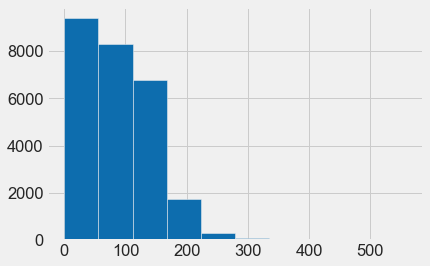

time: 162 ms


In [48]:
q1_si_sa.weighted_ave.hist()

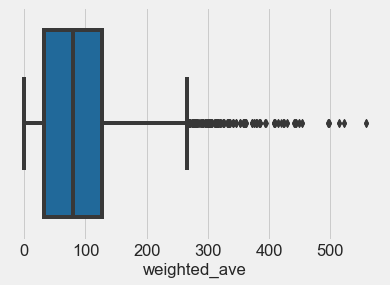

time: 109 ms


In [49]:
sns.boxplot(x=q1_si_sa['weighted_ave']);

In [50]:
Q1 = q1_si_sa.weighted_ave.quantile(0.25)
Q3 = q1_si_sa.weighted_ave.quantile(0.75)
IQR = Q3 - Q1
IQR

93.36

time: 6.12 ms


In [51]:
q1_si_sa = q1_si_sa[~((q1_si_sa.weighted_ave < (Q1 - 1.5 * IQR))\
                              |(q1_si_sa.weighted_ave > (Q3 + 1.5 * IQR)))].copy()

time: 19.7 ms


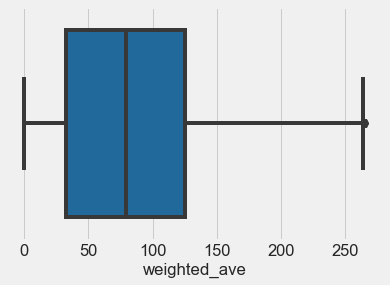

time: 113 ms


In [52]:
sns.boxplot(x=q1_si_sa['weighted_ave']);

In [53]:
q1_si_sa.weighted_ave.describe()

count    26410.000000
mean        82.609124
std         56.521794
min          0.000000
25%         32.800000
50%         79.000000
75%        125.280000
max        266.260000
Name: weighted_ave, dtype: float64

time: 6.84 ms


In [54]:
q1_si_sa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26427 entries, 0 to 26649
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                26427 non-null  object 
 1   region                26427 non-null  object 
 2   highest_education     26427 non-null  object 
 3   imd_band              25430 non-null  object 
 4   age_band              26427 non-null  object 
 5   num_of_prev_attempts  26427 non-null  object 
 6   studied_credits       26427 non-null  object 
 7   disability            26427 non-null  object 
 8   final_result          26427 non-null  object 
 9   id_assessment         26427 non-null  object 
 10  date_submitted        26427 non-null  object 
 11  is_banked             26427 non-null  object 
 12  score                 26380 non-null  object 
 13  course_length         26427 non-null  int64  
 14  date_shift            26427 non-null  int64  
 15  row_id             

In [55]:
q="""
SELECT
/*selecting all from multiple tables*/
SV.*,
C.*,
/*shifting the date*/
SV.date + 25 AS date_shift,
/* creating the row_id column by concatenation*/
SV.code_module || SV.code_presentation || SV.id_student AS row_id,
/* creating the click_sum column*/
SUM(SV.sum_click) AS click_sum,
/* creating the num_activities column*/
COUNT(SV.sum_click) AS num_activities
FROM
STUDENTVLE AS SV
JOIN COURSES AS C
ON C.code_module = SV.code_module
AND C.code_presentation = SV.code_presentation
WHERE
date_shift < 120
GROUP BY 
C.code_module,
C.code_presentation,
SV.id_student;
"""

svc = pd.read_sql(q, conn)

time: 10.3 s


In [56]:
drops = ['code_module','code_presentation','id_student', 'date_shift']
svc = svc.drop(drops, axis=1)

time: 10.7 ms


In [57]:
db.table_info('STUDENTVLE')

[(0, 'code_module', 'TEXT', 0, None, 0),
 (1, 'code_presentation', 'TEXT', 0, None, 0),
 (2, 'id_student', 'TEXT', 0, None, 0),
 (3, 'id_site', 'TEXT', 0, None, 0),
 (4, 'date', 'TEXT', 0, None, 0),
 (5, 'sum_click', 'TEXT', 0, None, 0)]

time: 3.67 ms


In [58]:
q1 = q1_si_sa.merge(svc, on='row_id')

time: 59.1 ms


In [59]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25990 entries, 0 to 25989
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      25990 non-null  object 
 1   region                      25990 non-null  object 
 2   highest_education           25990 non-null  object 
 3   imd_band                    25002 non-null  object 
 4   age_band                    25990 non-null  object 
 5   num_of_prev_attempts        25990 non-null  object 
 6   studied_credits             25990 non-null  object 
 7   disability                  25990 non-null  object 
 8   final_result                25990 non-null  object 
 9   id_assessment               25990 non-null  object 
 10  date_submitted              25990 non-null  object 
 11  is_banked                   25990 non-null  object 
 12  score                       25944 non-null  object 
 13  course_length               259

In [60]:
q1 = q1.merge(after_date, on='row_id')

time: 37 ms


In [61]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23010 entries, 0 to 23009
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      23010 non-null  object 
 1   region                      23010 non-null  object 
 2   highest_education           23010 non-null  object 
 3   imd_band                    22098 non-null  object 
 4   age_band                    23010 non-null  object 
 5   num_of_prev_attempts        23010 non-null  object 
 6   studied_credits             23010 non-null  object 
 7   disability                  23010 non-null  object 
 8   final_result                23010 non-null  object 
 9   id_assessment               23010 non-null  object 
 10  date_submitted              23010 non-null  object 
 11  is_banked                   23010 non-null  object 
 12  score                       22987 non-null  object 
 13  course_length               230

In [62]:
q1.describe()

,course_length,date_shift,target,weighted_ave,mean_score,click_sum,num_activities,date_registration,date_unregistration
count,23010.000000,23010.000000,23010.000000,23005.000000,23005.000000,23010.000000,23010.000000,23010.000000,2009.000000
mean,239.678444,49.912777,0.337288,86.569463,75.205800,792.284963,223.233203,-65.677749,170.524141
std,5.641752,12.924222,0.472794,56.620659,15.718019,892.486517,191.999609,47.079080,33.521215
min,234.000000,14.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-311.000000,121.000000
25%,240.000000,43.000000,0.000000,34.800000,67.750000,241.000000,87.000000,-94.000000,144.000000
50%,240.000000,46.000000,0.000000,84.400000,78.666667,506.000000,168.000000,-52.000000,165.000000
75%,241.000000,56.000000,1.000000,129.120000,86.333333,1011.000000,301.000000,-29.000000,198.000000
max,268.000000,119.000000,1.000000,266.260000,100.000000,12940.000000,1577.000000,69.000000,444.000000


time: 59 ms


In [63]:
Audio(sound_file, autoplay=True)

time: 7.39 ms


In [65]:
path = os.path.join(gparent, 'data/processed/q2.csv')

time: 768 µs


In [66]:
q1.to_csv(path, index=False)

time: 159 ms


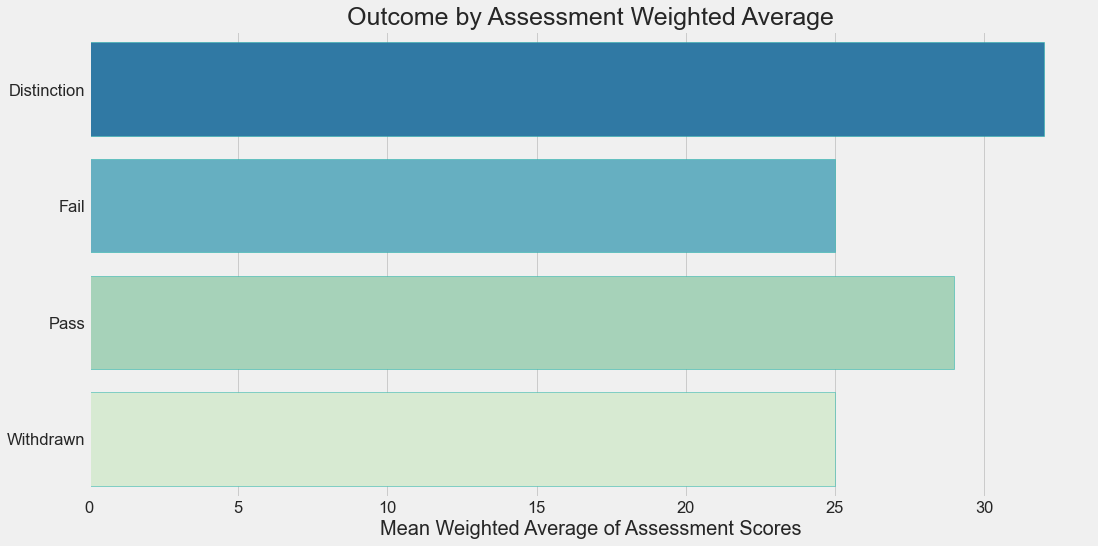

time: 207 ms


In [49]:
v.outcomes_wa(q1_si_sa)

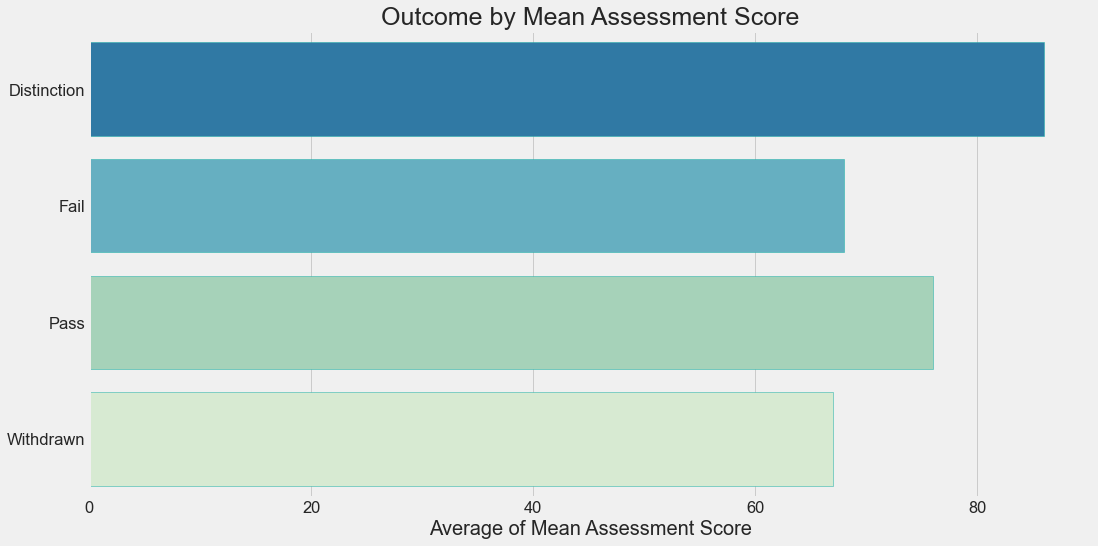

time: 152 ms


In [189]:
v.outcomes_mean(q1_si_sa)